In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re # regular Expression
# to handle special characters(*,@,&) used regular expression

In [32]:
# machine need to read emojies and other characters
df=pd.read_csv("/content/twitter_validation.csv",names=["id","location","target","text"],encoding="ISO-8859-1")
df

,id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [33]:
df.loc[df["target"]=="Irrelevant"]

,id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
22,2286,CallOfDuty,Irrelevant,Call of duty warzone (livestream) w/ subs #War...
27,9449,Overwatch,Irrelevant,They might not be the last team that has to ma...
28,10193,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,Best squad yet#pubg #pubgmobile #pubgkenya ins...
37,12997,Xbox(Xseries),Irrelevant,This is a really disappointing move by Remedy....
...,...,...,...,...
975,12949,Xbox(Xseries),Irrelevant,Microsoft Apparently Has 16 First-Party Xbox S...
978,10128,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,How Abhijeet Bhayya ur efforts are incredible ...
987,4905,GrandTheftAuto(GTA),Irrelevant,The ultimate pruning machine! @stihlusa GTA 26...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...


In [34]:
df.head()

,id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [35]:
df.tail()

,id,location,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [36]:
df.isna().sum()

id          0
location    0
target      0
text        0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1000 non-null   int64 
 1   location  1000 non-null   object
 2   target    1000 non-null   object
 3   text      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [38]:
df.describe()

,id
count,1000.000000
mean,6432.088000
std,3728.310569
min,6.000000
25%,3247.750000
50%,6550.000000
75%,9661.750000
max,13197.000000


In [39]:
df.target.value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

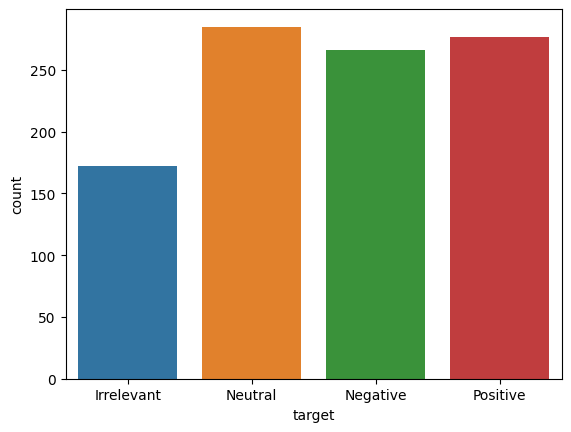

In [40]:
sns.countplot(x="target",data=df)

In [41]:
# we need to drop irrevalant filed in target columns

In [42]:
df.drop(df.index[(df["target"]=="Irrelevant")],axis=0,inplace=True)

In [43]:
df

,id,location,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [44]:
# index is not reseted in dataset

In [45]:
df.target.unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [46]:
df.shape

(828, 4)

In [47]:
# index reset
df.reset_index(drop=True,inplace=True)

In [48]:
df

,id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [49]:
df.drop(["id","location"],inplace=True,axis=1)

In [50]:
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [51]:
# postive=1
# negative=-1
# neutral=0

In [52]:
# df["target"].apply(lambda x: 0 if x=="Neutral"  else -1 if x=="Negative" 1 else if x=="Positive")
df["target"]=df["target"].map({"Neutral":0,"Negative":-1,"Positive":1})

In [53]:
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [54]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# from nltk.corpus import stopwords

# from nltk.tokenize import word_tokenize
# nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [56]:
# it is like word tokenizer
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets


0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [57]:
# seconda lambda used for join operation eg : BBC\n News\n Amazon \n


In [58]:
# remove special character

In [59]:
tweets=tweets.str.replace("[^a-zA-Z0-9]+"," ")
tweets

<ipython-input-59-961212271a38>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace("[^a-zA-Z0-9]+"," ")


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [60]:
sentance="Hai hello world isn,t ? I don't konw !!!, He is brillant in that field."
str1=re.sub('[^a-zA-Z0-9]'," ",sentance)
str1

'Hai hello world isn t   I don t konw      He is brillant in that field '

In [62]:
# collecting the  word length greater than 3
# it gives more meaning to th word

In [64]:
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:" ".join([w for w in word_tokenize(x) if len(w)>=3]) )
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

#Stemming

In [65]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer("english")
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

# Remove Stop words

In [67]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
stop=stopwords.words("english")
tweets=tweets.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
tweets


0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

#Vectorization-- TF-IDF

In [68]:
# convert word into numerical

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<828x3783 sparse matrix of type '<class 'numpy.float64'>'
	with 10505 stored elements in Compressed Sparse Row format>

In [71]:
# it generate 827 rows 3783 columns
data.shape

(828, 3783)

In [83]:
for i in data:
  print(i)

Streaming output truncated to the last 5000 lines.
  (0, 1686)	0.1426941022376787
  (0, 1107)	0.20413214180686093
  (0, 558)	0.3503582384515519
  (0, 2527)	0.2671994182522044
  (0, 3692)	0.3163176392658867
  (0, 2684)	0.3163176392658867
  (0, 625)	0.3163176392658867
  (0, 1095)	0.3163176392658867
  (0, 3037)	0.29806597655148137
  (0, 2069)	0.23566312955905294
  (0, 292)	0.4641201519883382
  (0, 375)	0.2320600759941691
  (0, 1747)	0.25391479227345826
  (0, 2694)	0.22271336877724404
  (0, 2043)	0.1696572290017407
  (0, 3454)	0.12507528412603328
  (0, 2504)	0.1284111906816165
  (0, 844)	0.10555553364159971
  (0, 1219)	0.21524337807190314
  (0, 3061)	0.43048675614380627
  (0, 66)	0.19401187226791594
  (0, 3397)	0.1768705115543723
  (0, 1068)	0.18717685405284837
  (0, 3690)	0.16917260280956378
  (0, 3107)	0.33834520561912756
  (0, 694)	0.14969189283830178
  (0, 1849)	0.16302594138629575
  (0, 3598)	0.18159223753873985
  (0, 2205)	0.18717685405284837
  (0, 1103)	0.18717685405284837
  (0, 324

In [72]:
y=df.target.values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X=data

In [91]:
# data.toarray()
# X.toarray()
X=X.toarray()

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [94]:
knn=KNeighborsClassifier(n_neighbors=7)
nb=GaussianNB()
sv=SVC()
lst_models=[knn,nb,sv]

In [95]:
from sklearn.metrics import classification_report
for i in lst_models:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print("  ")
  print(classification_report(y_test,y_pred))
  print(" ")


  
              precision    recall  f1-score   support

          -1       0.42      0.72      0.53        79
           0       0.51      0.37      0.43        79
           1       0.55      0.33      0.41        91

    accuracy                           0.47       249
   macro avg       0.49      0.47      0.46       249
weighted avg       0.49      0.47      0.45       249

 
  
              precision    recall  f1-score   support

          -1       0.49      0.53      0.51        79
           0       0.44      0.48      0.46        79
           1       0.50      0.43      0.46        91

    accuracy                           0.48       249
   macro avg       0.48      0.48      0.48       249
weighted avg       0.48      0.48      0.48       249

 
  
              precision    recall  f1-score   support

          -1       0.67      0.52      0.59        79
           0       0.46      0.76      0.57        79
           1       0.76      0.48      0.59        91

    acc